**DATA EXPLORATION**

1.**Import data** :
Start by importing the packages that we will use for this dataset.

In [1]:
# Import Libraries
import pandas as pd #for data analysis and manipulation
import numpy as np #for any large arrays and metrices
import matplotlib.pyplot as plt #for visualisation of our data
import seaborn as sns #also for visualisation 

2.**Load data**: We then proceed to loading the csv file into a pandas DataFrame named df. In this case, we will use the netflix titles.csv file from Kaggle.

In [2]:
df = pd.read_csv('/Users/dimphomola/Downloads/netflix_titles.csv') 

If this was an excel file, we would use: df = pd.read_excel('/Users/dimphomola/Downloads/netflix_titles.xlsx')

Once we have loaded the file, we move on to getting the details of the data file by doing the following:

In [3]:
df.shape

(8807, 12)

4. The .shape function is used to call the dimension of the Pandas DataFrame or Series

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

5 .columns function is used to check the column labels

In [5]:
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

6 .info fucntion us used to print a summary of the DataFrame

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


7 .head() fucntion is used to view the first 5 rows of the column, this will help us see the type of data we have.

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

8 .describe() will help with getting descriptive statistics of our dataset.

Now once we have viewed our data, we want to identify any missing data/variables in our dataset and have this data cleaned, this will help with the accurecy and the reliability of our dataset

**DATA CLEANING**

In [9]:
missing = df.isnull().sum()
print(missing)
df.isnull().any()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

We have used missing = df.isnull().sum() to check how many missing data in each columns and df.isnull().any() to identify if there are any missing data/Null values.

Now we decide whether we fill or drop the miissing data as we cannot have NAN/Null values on our dataset. As an example, In the Netflix_title.csv file, we will be filling the data country, date_added, release_year, rating, duration and drop the cast and director column.

In [10]:
#To drop the cast and director columns:
df_dropped = df.dropna(subset=['director', 'cast']) #dropna, used to remove columns or rows.

In [11]:
#Fill Country, director, cast and date added (catagorical data) with "Unknown"
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [12]:
# Fill rating and duration with the mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [13]:
missing = df.isnull().sum()
print(missing)
df.isnull().any()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

Now that we have no missing/Nan/Null values, we can proceed to visualise our data.

But first, Let's convert one of the other columns we have to a numerical dataset. 

in this dataset, we have only 1 numerical data column, which makes the correlation less meaningful as we need at least 2 data columns for a proper correlation analyis (which we will do later)

In [14]:
df_movies = df[df["type"] == "Movie"].copy()

We will call the new numerical data of the "duration" column, "duration_minutes" in our new DataFrame "df_movies" and use  str.extract() to pull out the (\d+) which means any digit (0-9) from the duration column will be pulled our and a new column added for the extracted values and use astype(float) to convert the data from string to numeric terms, in this analysis we will use only the "movies" data 

In [15]:
df_movies["duration_minutes"] = df_movies["duration"].str.extract("(\d+)").astype(float)
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0


Let's call our outliers and have them cleared from our dataset

In [16]:
Q1 = df_movies["duration_minutes"].quantile(0.25)
Q3 = df_movies["duration_minutes"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

We clear the data below the lower bound and above the upper bound

In [17]:
df_movies_clean = df_movies[(df_movies["duration_minutes"] >= lower_bound) &
    (df_movies["duration_minutes"] <= upper_bound)]

**Data Visualisation**

Now that we have seen and cleaned our dataset, let's move on to visualising it. Here we will start with a Histogram. We know that histograms are used for data distributions or to summarise our data on an interval scale. Let's see how our Netflix_titles data looks like

We will plot a histogram to show us which duration is the most in the netflix_title dataset with an interval of 30 minutes as our x-axist and the number of movies as our y-axist

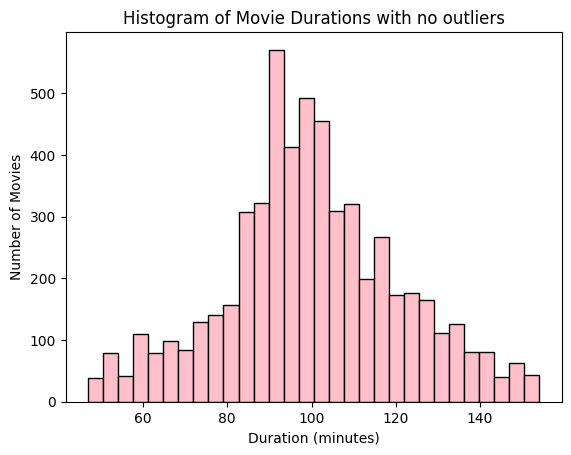

In [18]:
plt.hist(df_movies_clean["duration_minutes"], bins=30, color ="pink", edgecolor="black")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.title("Histogram of Movie Durations with no outliers")
plt.show()

We will use the same concept of the histogram with our boxplot, we will have the x-axis as our movie duration in minutes.

 Here we are able to see our boxplot (box and whisker diagram) where the box illustrates our IQR = 50% of our data also known as our median, our Q1 = 25% of our data also known as the First quartile and Q3 = 75% of our data, also known as the Third Quartile, then the whiskers show us the min value and the max value DataFrame.

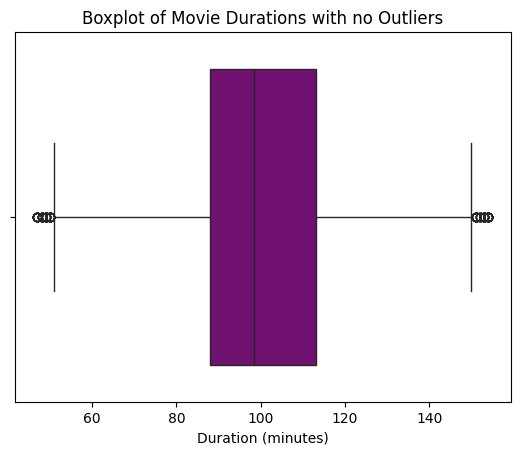

In [19]:
sns.boxplot(x=df_movies_clean["duration_minutes"], color="purple")
plt.xlabel("Duration (minutes)")
plt.title("Boxplot of Movie Durations with no Outliers")
plt.show()

For our correlation analysis, we will use the correlation matrix, .corr to call the correlation for the numerical data only, using numeric_only=True

In [20]:
corr = df_movies_clean.corr(numeric_only=True)
corr

,release_year,duration_minutes
release_year,1.000000,-0.133305
duration_minutes,-0.133305,1.000000


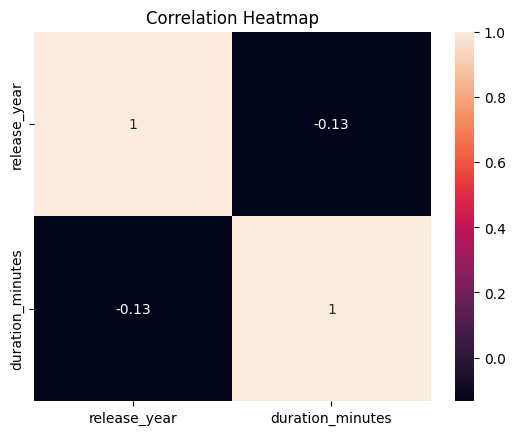

In [21]:
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

A weak negative correlation (–0.13), suggesting newer movies tend to be slightly shorter, but the effect is tiny